In [1]:
import sys
import numpy as np
import sys
print(sys.version)

from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from phasor import alm
from phasor.alm.mplot import MPlotter
#import phasor.alm.fitter as FIT
mplot = MPlotter()

mpl.rc('font', family='DejaVu Sans')
asavefig.org_subfolder = 'gtable'

3.5.3 (default, May 10 2017, 15:05:55) 
[GCC 6.3.1 20161221 (Red Hat 6.3.1-1)]
Populating the interactive namespace from numpy and matplotlib


0.0005725
-15.75
[[  2.98428118e-05   3.73243674e-06]
 [  3.73243674e-06   5.29613309e-07]]


(-0.20204414292646744, 0.016235929522413366)

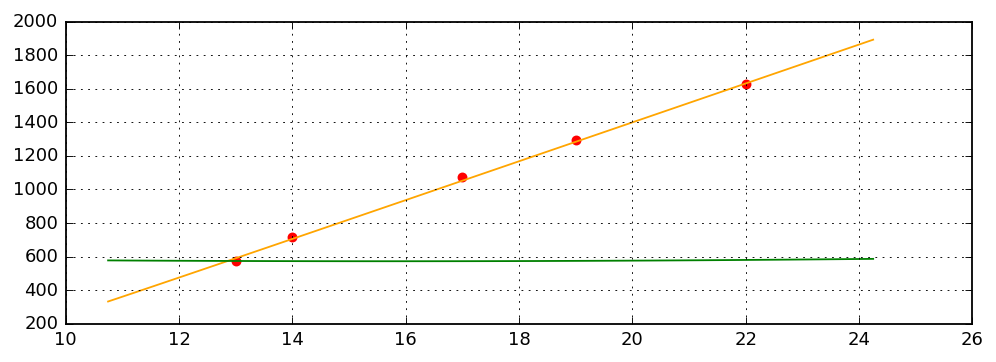

In [9]:
q_EOM = alm.QFit(                                                             
            wavelen_nm = 1064.,                                                      
            R_um = np.array([1145., 1434., 2153., 2594., 3250.]) / 2,                                  
            Z_in = [13, 14, 17, 19, 22],
            m2 = 1.01,
        )  
q_EOM.plot(init = True)

(q_EOM.q_fit.Z, q_EOM.q_fit.ZR)

0.000522
-8.5


/home/mcculler/local/home_sync/projects/phasor/phasor/alm/beam_fit.py:64: RuntimeWarning: invalid value encountered in sqrt
  return (self.m2 * self.wavelen_nm * 1e-9 / (np.pi * z_R) * ((z + z_0)**2 + z_R**2))**.5


Bunch(
    'ax0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f415742ff28>,
    'ax0_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f415742ff28>,
    'ax_bottom' = <matplotlib.axes._subplots.AxesSubplot at 0x7f415742ff28>,
    'ax_grid_colrow' = [[<matplotlib.axes._subplots.AxesSubplot at 0x7f415742ff28>]],
    'ax_list' = [<matplotlib.axes._subplots.AxesSubplot at 0x7f415742ff28>],
    'ax_list_0' = [<matplotlib.axes._subplots.AxesSubplot at 0x7f415742ff28>],
    'ax_top' = <matplotlib.axes._subplots.AxesSubplot at 0x7f415742ff28>,
    'fig' = <matplotlib.figure.Figure at 0x7f41576108d0>,
    'save' = <function phasor.utilities.mpl.autoniceplot.mplfigB.<locals>.save>,
    )

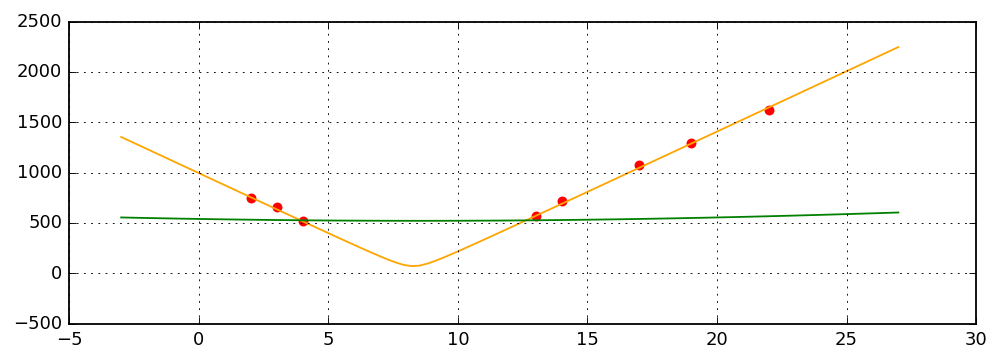

In [13]:
q_EOM = alm.QFit(                                                             
            wavelen_nm = 1064.,                                                      
    R_um = np.array([1502, 1327, 1044, 1145., 1434., 2153., 2594., 3250.]) / 2,                                  
    Z_in = [2,3,4,13, 14, 17, 19, 22],
            m2 = 1.01,
    #Z0_ZR_init = (q_EOM.q_fit.Z, q_EOM.q_fit.ZR),
        )  
q_EOM.plot(init = True)

0.001242
-1.5


Bunch(
    'ax0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f41574ff550>,
    'ax0_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7f41574ff550>,
    'ax_bottom' = <matplotlib.axes._subplots.AxesSubplot at 0x7f41574ff550>,
    'ax_grid_colrow' = [[<matplotlib.axes._subplots.AxesSubplot at 0x7f41574ff550>]],
    'ax_list' = [<matplotlib.axes._subplots.AxesSubplot at 0x7f41574ff550>],
    'ax_list_0' = [<matplotlib.axes._subplots.AxesSubplot at 0x7f41574ff550>],
    'ax_top' = <matplotlib.axes._subplots.AxesSubplot at 0x7f41574ff550>,
    'fig' = <matplotlib.figure.Figure at 0x7f41576a6b70>,
    'save' = <function phasor.utilities.mpl.autoniceplot.mplfigB.<locals>.save>,
    )

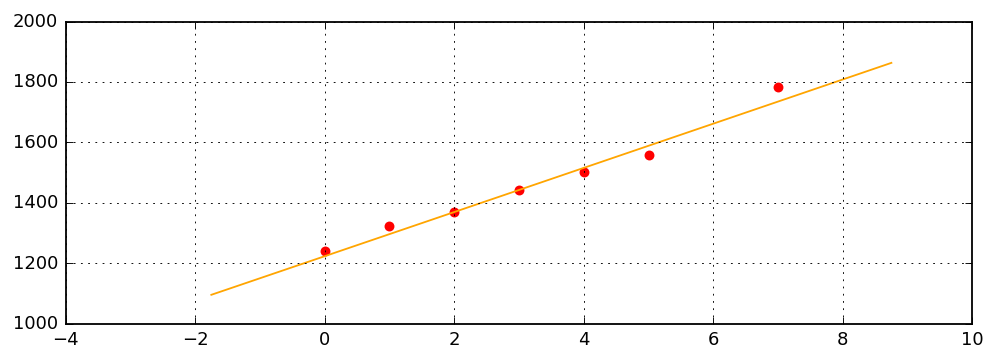

In [4]:
q_PBS = alm.QFit(                                                             
            wavelen_nm = 1064.,                                                      
            R_um = np.array([2484, 2644, 2741, 2884, 3003, 3120, 3570]) / 2,                                   
            Z_in = [0, 1, 2, 3, 4, 5, 7],                                                          
            m2 = 1.01,
        )  
q_PBS.plot()

In [5]:
sys = alm.RootSystem( 
    env_wavelength_nm = 1064,
)

#sys.own.q_in = alm.System(loc_in = 0)
sys.own.q_pbs = alm.BeamTarget(loc_in = 0, q_raw = q_PBS.q_fit.propagate_distance(-8 * .0254))
sys.own.L1 = alm.ThinLens(loc_in = 4, f_mm = 150)
sys.own.q_eom = alm.BeamTarget(loc_in = 8, q_raw = q_EOM.q_fit)
#sys.own.L2 = alm.PLCX(loc_in = 19, R_mm = 46.4, L_mm = 4)
sys.own.L2 = alm.ThinLens(loc_in = 19, f_mm = 88.3)
sys.own.q_out = alm.BeamTarget(loc_in = 29, q_raw = alm.ComplexBeamParam.from_Z_W0(0, 300e-6 / 2., wavelen = 1064e-9))

ax = mplot.plot('to_fiber', sys.measurements)
sys.measurements.q_target_z(1.42).value
abs(sys.measurements.overlap('q_eom', 'q_out'))**4

/home/mcculler/local/home_sync/projects/phasor/phasor/utilities/mpl/autoniceplot.py:119: UserWarning: Image name contains '_' which will be changed to '-' to fix nbsphinx export
  warnings.warn("Image name contains '_' which will be changed to '-' to fix nbsphinx export")


![gtable/to-fiber](gtable/to-fiber.png?1500329201 "gtable/to-fiber")
[png](gtable/to-fiber.png),  [pdf](gtable/to-fiber.pdf)

0.04700091432314614

In [6]:
q = alm.ComplexBeamParam.from_Z_W0(0, 300e-6, wavelen = 1064e-9)
q.ZR

0.2657362206983847

In [7]:
import phasor.fitting.casadi as FIT

fitter = FIT.FitterRoot()
fitter.own.sym = FIT.FitterSym()
fitter.systems.alm = sys
fitter.sym.parameter(sys.L2.loc_in)
#fitter.sym.parameter(sys.q_out.loc_in)

def objective(alm):
    return abs(alm.measurements.overlap('q_eom', 'q_out'))**4
print("HEY: ", objective(sys))
fitter.own.overlap = FIT.FitterExpression(
    function = objective,
)
ret = fitter.overlap.minimize_function()
print("OVERLAP: ", objective(ret.systems.alm))
ax = mplot.plot('quickfit', ret.systems.alm.measurements)

HEY:  0.0470009143231

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        4
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of It

![gtable/quickfit](gtable/quickfit.png?1500329206 "gtable/quickfit")
[png](gtable/quickfit.png),  [pdf](gtable/quickfit.pdf)